# k-近邻算法

## k-近邻算法概述

* 优点：
    * 精度高，对异常值不敏感，无数据输入假定
* 缺点：
    * 计算复杂度高、空间复杂度高
* 适用数据范围：数值型和标称型
* 算法流程
    * 计算已知类别数据集中点与当前点之间的距离
    * 按照距离递增次序排序
    * 选取当前点距离最小的k个点
    * 确定前k个点所在类别的出现频率
    * 返回前k个点出现频率最高的类别作为当前点的预测分类

## 导入数据

In [1]:
import numpy as np
import operator # 用C语言编写的各种运算符

In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
def classify0(inX, dataSet, labels, k):
    '''k-近邻算法
    params:
        inX: 测试数据，向量，包含所有特征
        dataSet: 训练数据集
        labels: 标签
        k: 近邻数
    return:
        predicted_label    
    '''
    # 训练数据集样本数
    dataSetSize = dataSet.shape[0]
    # 创建一个每行都是 测试数据 inX 的 array， 并和训练数据相减（计算距离的第一步）
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 对上式结果平方
    sqDiffMat = diffMat**2
    # 对上式结果按照列加总（横向加总）
    sqDistances = sqDiffMat.sum(axis=1)
    # 开根号后得到距离所有点的距离
    distances = sqDistances**0.5

    # 获得排序结果（返回的是从大到小的序列index）
    sortedDistanceIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistanceIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 将最终结果，按照数量降序输出，得到最高的值
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

_代码解释与改动：_
* iteritems 改用 items
* sorted 的 key 中传入的是一个函数，operator内的这个函数刚好实现了我们想要的功能，当然也可以自己写类似的函数

In [4]:
operator.itemgetter(1)([0,1])

1

In [5]:
# 测试
group, labels = createDataSet()
classify0([0, 0], group, labels, 3)

'B'

__算法可改进点：（改进算法应该会在 ML_tools 中体现）__

* 点之间的距离可以直接用矩阵计算的形式得到
* 排序并不需要对所有点做全排序，只要找到最近的k个点就可以
* 有关距离的定义，这里限定死了是欧氏距离，其实可以是任何自定义的距离
    

## 示例： 使用 k-近邻算法改进约会网站的配对效果

### 准备数据：从文本文件中解析数据

In [6]:
# 一般直接用 pd.read_csv 的方式会更方便，不过这里还是码一遍代码
def file2matrix(filename):
    '''文件数据读取函数，该方法只适合读取特定文件'''
    with open(filename) as f:
        arrayOLines = f.readlines()
    numberOfLines = len(arrayOLines)
    # 规定好了，特征集是 3列
    returnMat = np.zeros((numberOfLines, 3))
    # 第四列是 label
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        # 去除两边的空格可能
        line = line.strip()
        # 用 \t 分隔
        listFromLine = line.split('\t')
        # 第 index 行用 listFromLine 的 前三个数字填充
        returnMat[index, :] = listFromLine[0: 3]
        # 最后一个值是 label
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

_代码解释与改动：_
* open 用 with ... as ... 的方式

In [7]:
filename = '../Data/ch2/datingTestSet2.txt'
datingDataMat, datingLabels = file2matrix(filename)

### 分析数据： 使用 Matplotlib 创建散点图

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

_有关 matplotlib 中文输出_

* matplotlib虽然支持unicode编码，但是并没有中文字体，所以当要输出中文字符的时候后台的二进制流找不到合适的表现方式，导致输出方块
* matplotlib是用的自己的一个字体库，并没有和系统打通
* 具体解决方案（其中一种，另外还可以通过设置 font_properties 的方式指定字体）：
    * 找到中文字体：可以自行在网上搜
    * 将中文字体放入字符库，路径可以在 ~/.matplotlib/font\* .json 中找到
    * 在 ~/.matplotlib 中  rm -rf ~/.matplotlib/\*.cache，同时将 font\*.json 文件重命名或者移走，这样在重启 matplotlib 的时候，能够重新扫描字体库
    * 在 python 中，matplotlib 使用字体的控制方法是 plt.rcParams内的 font.family 和 font.XXX(相应字体族)，font.family 确定使用的字体族，然后在相应的字体族（XXX）列表里去找能够找到的字体。
    * 因为matplotlib不支持中文字体的字体族判断，所以我们手动设置，最常见的sans-serif 字体族的中文字体就是 黑体，同时在 font.family 中指定 黑体

In [16]:
# 为输出中文而准备
params={'font.family':'monospace',
        'font.monospace':'WenQuanYi Micro Hei Mono',
        'font.style':'normal',
        'font.weight':'bold',
        'font.size':'30'
        }
plt.rcParams.update(params)

[(-0.09475799681180536, 2),
 Text(0, 0.5, '每周消费的冰激凌公升数'),
 (-1.0521183369929246, 25),
 Text(0.5, 0, '玩视频游戏所耗时间百分比')]

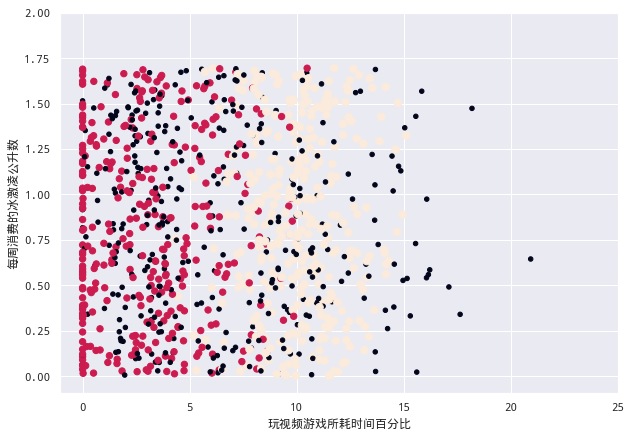

In [17]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(
    datingDataMat[:, 1],
    datingDataMat[:, 2],
    c=datingLabels,
    s=np.dot(20, datingLabels)
)

ax.set(xlabel = '玩视频游戏所耗时间百分比',
      ylabel = '每周消费的冰激凌公升数',
      xlim = (None,25),
      ylim = (None,2))

_代码解释与改动：_
* 画图的代码有一套自己的写法，不使用书本写的代码，以后就不提醒了
* c 和 s 参数的传入 书中使用了转 array 的方法，这里直接使用了 np.dot 

[(-0.09475799681180536, 2),
 Text(0, 0.5, '每周消费的冰激凌公升数'),
 (-1.0521183369929246, 25),
 Text(0.5, 0, '玩视频游戏所耗时间百分比')]

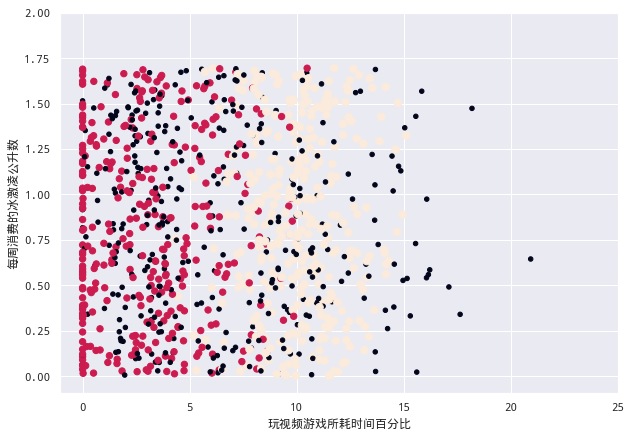

In [18]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(
    datingDataMat[:, 1],
    datingDataMat[:, 2],
    c=datingLabels,
    s=np.dot(20, datingLabels)
)


ax.set(xlabel = '玩视频游戏所耗时间百分比',
      ylabel = '每周消费的冰激凌公升数',
      xlim = (None,25),
      ylim = (None,2))

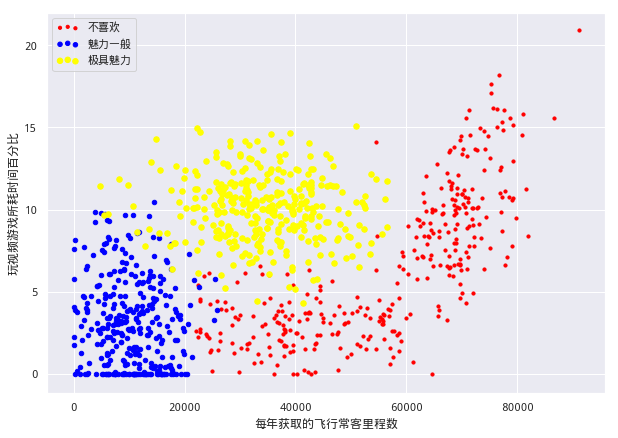

In [19]:
[i == 3 for i in datingLabels]

fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(
    datingDataMat[[i == 1 for i in datingLabels], 0],
    datingDataMat[[i == 1 for i in datingLabels], 1],
    c='red',
    s= 10,
    label = '不喜欢'
)
ax.scatter(
    datingDataMat[[i == 2 for i in datingLabels], 0],
    datingDataMat[[i == 2 for i in datingLabels], 1],
    c='blue',
    s= 20,
    label = '魅力一般'
)
ax.scatter(
    datingDataMat[[i == 3 for i in datingLabels], 0],
    datingDataMat[[i == 3 for i in datingLabels], 1],
    c='yellow',
    s= 30,
    label = '极具魅力'
)

ax.set(xlabel = '每年获取的飞行常客里程数',
      ylabel = '玩视频游戏所耗时间百分比')

ax.legend(scatterpoints = 3)

### 准备数据：归一化数值

* 如果不归一化，我们发现数字差值最大的属性对计算的结果影像的最大，因此要对数据做归一化（认为三个属性对结果来说同等重要，如果重要性有差异，可以归一化以后赋予不同的权重）  
* 这里用到的归一化方法是最大最小值归一法

In [20]:
def autoNorm(dataSet):
    # 按照对应 axis 的方向得到最大最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(dataSet.shape)
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [21]:
autoNorm(datingDataMat)

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))